# Importing the libraries and importing the data

In [119]:
# Start coding here... 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict

# Importing the CSV file
df = pd.read_csv('startup_funding.csv', dtype=str)


## Coding Working---

1. Imported the libraries- pandas, numpy and matplotlib.pyplot
2. Imported the data.

# Cleaning the Data

The first step is to clean the data and make it suitable for analysis

## 1. Cleaning the CityLocation Column

In [120]:
# function for cleaning the CityLocation
def city(a):
    c = str(a)
    if 'bangalore' in c or 'Bangalore' in c:
        return 'Bangalore'
    elif 'Delhi' in c or 'Gurgaon' in c or 'Noida' in c:
        return "NCR"
    elif 'Mumbai' in c:
        return 'Mumbai'
    elif 'Pune' in c:
        return 'Pune'
    elif 'Chennai' in c:
        return 'Chennai'
    elif 'Hyderabad' in c:
        return 'Hyderabad'
    else:
        return a

df["CityLocation"]= df["CityLocation"].apply(city)

## Coding Working---

1. Created a function city to look for the name of various cities in the CityLocation Column.
2. Applied the function city using the apply function on the pandas series of CityLocation Column.

## 2. Cleaning the AmountInUSD column

The AmountInUSD column has null values and the numbers are not in suitable format. Now, we will clean the AmountInUSD Column.

In [121]:
# Functiong for converting the AmountInUSD column data to integer
def amount(s):
    s = str(s)
    amt =0
    for ele in s:
        if ele.isdigit():
            amt = amt*10+int(ele)
    return amt

df["AmountInUSD"]= df["AmountInUSD"].apply(amount)

## Coding Working---
1. Created a function amount to convert the string value of amount to Integer.
2. Applied the function amount using the apply function on the pandas series of AmountInUSD Column.

## 3. Cleaning for Name of Startups

Cleaning the StartName column, and standardising the StartupName for analysis

In [122]:
# Cleaning for major startups like Oyo, Ola, Paytm, and Flipkart
def start(s):
    a = str(s)
    if 'Paytm'  in a:
        return 'Paytm'
    elif 'Ola' in a:
        return 'Ola'
    elif 'Oyo' in a or 'OYO' in a:
        return 'Oyo'
    elif 'Flipkart' in a:
        return 'Flipkart'
    else:
        return s
    
df.StartupName = df.StartupName.apply(start)

## Coding Working---
1. Created a function start to clean the StartupName column for major startups.
2. Applied the function start using the apply function on the pandas series of StartupName Column.

# Question 1

- We have to find the best out of the 3 locations- Bangalore, Mumbai, and NCR for the startup. We will do so by finding the location where startups has received funding maximum number of times
- We will start by exploring the data.
- First we will see which cities lead(top 5) in terms of amount of funding received
- Next, we will group our data by cities and see count the number of fundings for each city.

## Finding the top 5 cities by funding

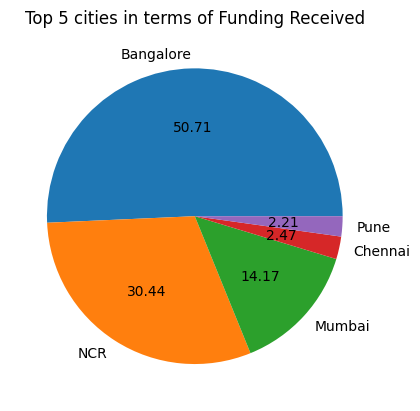

Bangalore 50.71
NCR 30.44
Mumbai 14.17
Chennai 2.47
Pune 2.21


In [123]:
# Grouping by cities and finding the total funding amount for each city.
funding = df.groupby('CityLocation').AmountInUSD.sum()
funding= funding.sort_values(ascending=False)

# finding the top 5 cities in terms of funding
top = funding[:5]
plt.pie(top.values, labels=top.index, autopct='%.2f')
plt.title('Top 5 cities in terms of Funding Received')
plt.show()
t = 100.0/sum(top.values)
for city in top.index:
    pct = top[city]*t
    print('{} {:.2f}'.format(city, pct))

## Coding Working---
1. Used the GroupBy function and the sum function on the AmountInUSD column to get the funding amount for each city.
2. sliced the top 5 rows of the funding dataframe and stored it in top
3. Created a pie chart using the top dataframe.

## Cities by number of funding rounds

- Now, we come to our problem statement to find the city with maximum number of funding rounds.

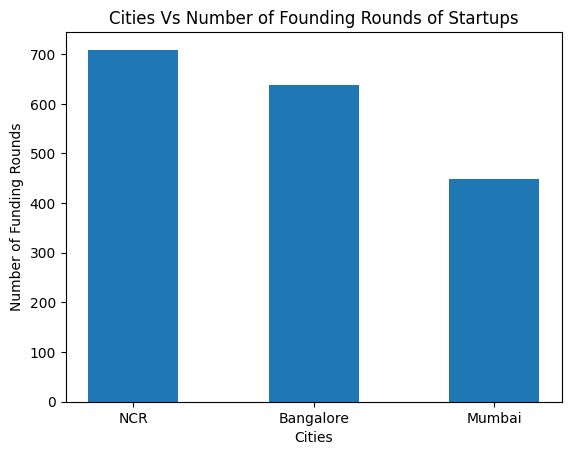

NCR 709
Bangalore 637
Mumbai 449


In [124]:
top_cities= df['CityLocation'].value_counts()
#print(funding.index)
top = top_cities[:3]
plt.bar(top.index, height=top.values, width = 0.5)
plt.title('Cities Vs Number of Founding Rounds of Startups')
plt.xlabel('Cities')
plt.ylabel('Number of Funding Rounds')
plt.show()
for city in top.index:
    num = top[city]
    print('{} {}'.format(city, num))

## Coding Working---
1. Using value_counts() function we calculated the number of record for each City. 
2. Using plt.bar() function created a bar chart of the data.

### Analysis

- NCR is the clear winner in terms of funding round for startups.
- However it also needs to be kept in mind that, Bangalore is the leader when it comes to amount of funding receiver. NCR comes second to Bangalore in terms of funding received.

Our answer to Question 1- "NCR"

# Question 2

- We have to find the top 5 investors in terms of number of fundings given.
- We start by cleaning the Investor data 
- After cleaning we will count the number of investments for each investor


## 1. Identifying the top Investors

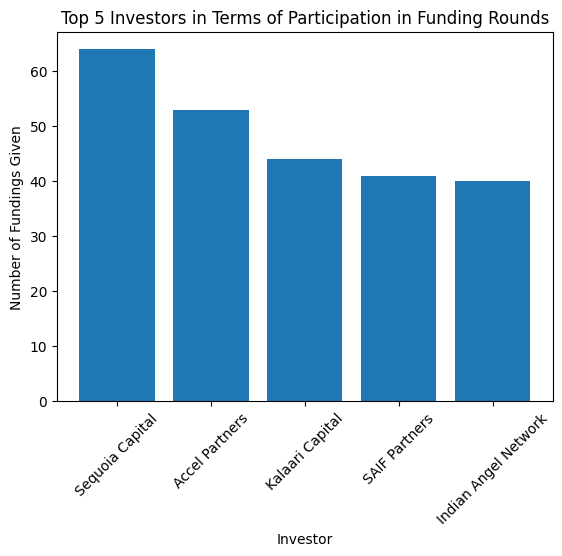

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [125]:
# Cleaning the InvestorName column
# out array will store the Investor name(s) for each funding.
out = []
def inv(s):
    s =str(s)
    if ',' in s:
        a = s.split(',')
        for ele in a:
            ele = ele.strip()
            out.append(ele)
    else:
        out.append(s)            
    return s
df.InvestorsName.apply(inv)

# Using Counter to find the top 5 investors
top = Counter(out)
top_5 = top.most_common(5)

# Unzipping the data
inv, numf = list(zip(*top_5))

# creating a bar chart
plt.bar(inv, height=numf)
plt.title('Top 5 Investors in Terms of Participation in Funding Rounds')
plt.ylabel('Number of Fundings Given')
plt.xlabel('Investor')
plt.xticks(rotation=45)
plt.show()
for ele in top_5:
    print(*ele)

## Coding Working---
1. Created a list out which stores the investors data for each funding record.
2. Used the Counter function to calculate the counts for each value in the out array.
3. Used the most_common() function to find the top 5 investors.

### Analysis

- Sequoia capital is the most paticipate investor. It has participated in about 64 rounds of funding for various startups.

Answer to Question 2- 
Our friend show definitely look for these investors- Sequoia Capital, Accel Partners, Kalaari Capital, SAIF Partners, and Indian Angel Network.

# Question 3

- We have to find the top 5 investors who have invested maximum number of times in different companies.
- We will do so by finding the startups in which the investors have invested, avoiding any repetition in startup name.

## Filtering for repeatition in Data

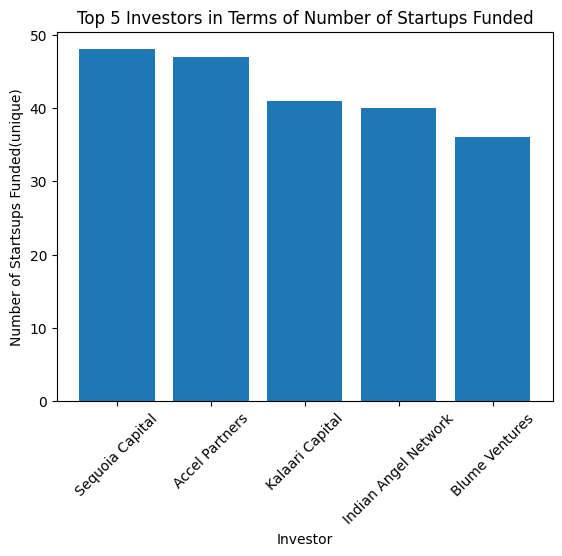

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


In [126]:
investors= defaultdict(list) # Dictonary for Investors and their companies
investment = defaultdict(int) # Dictonary storing the count of seed and crowd funding for each investor
PE = defaultdict(int) # Dictonary storing the count of Private Equity funding for each investor

# Iterating over each row of the dataframe
for row in df.itertuples():
    temp = str(row.InvestorsName)
    strt = str(row.StartupName)
    inv = str(row.InvestmentType)
    # filtering the Undisclosed Investors
    if temp == 'Undisclosed Investors' or temp =='Undisclosed investors':
        continue        
    # Checking whether there are multiple investors or single investor
    if ',' in temp:
        a = temp.split(',')
        for ele in a:
            ele = ele.strip()
            # Filterting for Unique Startup Names
            if strt not in investors[ele] and ele != '':
                investors[ele].append(strt)
                if inv =='Seed Funding' or inv == 'Crowd Funding':
                    investment[ele] += 1
                if inv == 'Private Equity':
                    PE[ele] += 1
    elif temp != '' or temp!= ' ':
        # Filterting for Unique Startup Names
        if strt not in investors[temp]:
            investors[temp].append(strt)
            if inv =='Seed Funding' or inv == 'Crowd Funding':
                investment[temp] += 1
            if inv == 'Private Equity':
                    PE[temp] += 1
    
# Counting the number of unique companies in which the investors have invested       
for ele, val in investors.items():
    investors[ele] = len(val)
top = Counter(investors)
top_5 = top.most_common(5)
inv, numf = list(zip(*top_5))
plt.bar(inv, height=numf)
plt.xticks(rotation=45)
plt.title('Top 5 Investors in Terms of Number of Startups Funded')
plt.ylabel('Number of Startsups Funded(unique)')
plt.xlabel('Investor')
plt.show()
for ele in top_5:
    print(*ele)


## Coding Working---
1. Created a default dictionary of lists - 'investors'. It will store the unique startup names for each investor.
2. Created a default dictionary of integers - 'investment'. It will store the seed and crows funding investment count for each investor.
3. Created a default dictionary of integers - 'PE'. It will store the Private Equity investment count for each Investor
4. Iterated over the dataframe using the itertuples() function.
5. Extracted the values of startupName, investement type and investors for each record.
6. Filtered for Undisclosed Investors.
7. Filtered for unique records of startup names. 
8. Updated the dictonaries as per the values.

### Analysis

Answer to Question 3-
The top 5 investors in terms of number of unique startups funded are: Sequoia Capital, Accel Partners, Kalaari Capital, Indian Angel Network, and Blume Ventures.

# Question 4

- We have to find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding.
- We have already caluclated this in the previous loop and stored the count in the dictonary 'investment'.

## Calculating for Seed Funding and Crowd Funding investments

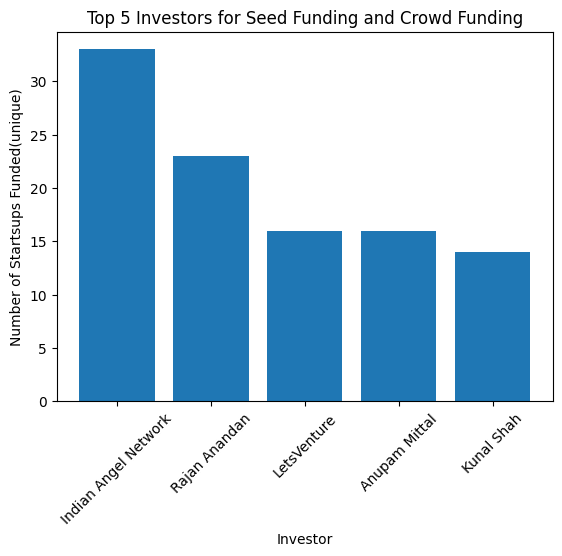

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


In [127]:
top = Counter(investment)
top_5 = top.most_common(5)
inv, numf = list(zip(*top_5))
# Plotting the graph
plt.bar(inv, height=numf)
plt.xticks(rotation=45)
plt.title('Top 5 Investors for Seed Funding and Crowd Funding')
plt.ylabel('Number of Startsups Funded(unique)')
plt.xlabel('Investor')
plt.show()
for ele in top_5:
    print(*ele)


## Coding Working---
1. Converted the investment dictionary into a Counter object.
2. Extracted the top 5 values from investment.
3. Plotted the graph

### Analysis

Answer to Question 4 -
The top 5 investors for Seed Funding and Crowd Funding are: Indian Angel Network, Rajan Anandan, LetsVenture, 
Anupam Mittal, and Kunal Shah.

# Question 5

- We have to find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.
- We have already caluclated this in the previous loop and stored the count in the dictonary 'PE'.

## Calculating for Private Equity Investment

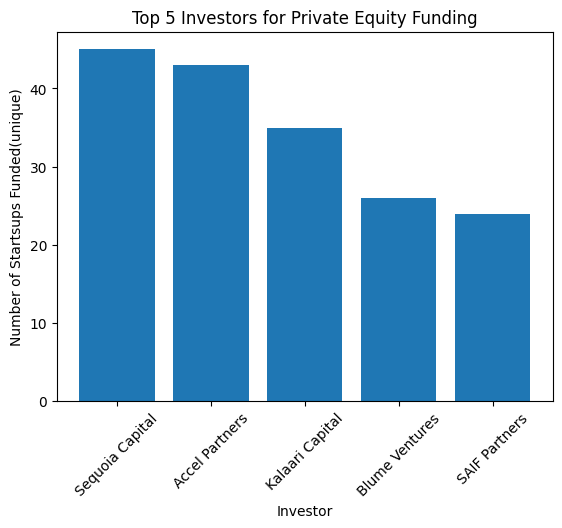

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 26
SAIF Partners 24


In [128]:
top = Counter(PE)
top_5 = top.most_common(5)
inv, numf = list(zip(*top_5))
# Creating the Chart
plt.bar(inv, height=numf)
plt.xticks(rotation=45)
plt.title('Top 5 Investors for Private Equity Funding')
plt.ylabel('Number of Startsups Funded(unique)')
plt.xlabel('Investor')
plt.show()
for ele in top_5:
    print(*ele)

## Coding Working---
1. Converted the PE dictionary into a Counter object.
2. Extracted the top 5 values from investment.
3. Plotted the graph

### Analysis

Answer to Question 5 -
The top 5 investors for Private Equity Funding are: Sequoia Capital, Accel Partners, Kalaari Capital, Blume Ventures, and SAIF Partners.